In this Notenook we obtain the Wannier tight-binding Hamiltonian for $\rm MoS_2$ and calculate it's transmission

In [2]:
%load_ext autoreload
#%autoreload 2
import matplotlib.pyplot as plt
from matplotlib import rc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib import rc
import math
import os
import sys
import subprocess
sys.path.insert(0,str(os.getcwd())+'/../EPWpy/')
#sys.path.insert(0,str(os.getcwd())+'/../EPWpy/plotting/')
import EPWpy
from EPWpy import *
from plotting import plot_bands

#sys.path.insert(0, '/workspace/QE_sabyadk/QE_SXT/bin/')
#print(sys.path)
############ Nice plot generation##################
#rc('text',usetex=True)
#rc('font',family='serif')
#import matplotlib as mpl
#mpl.rcParams['axes.linewidth'] = 1.5
#from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})
###################################################
################################
####Constants########
nr=3.3
hbar=6.6*10**-16
c=3*10**10
font=16
################################

##################
#Define folders for inputs

folder='./'

cores='4'
prefix='MoS2'
pseudo='/home1/05193/sabyadk/jupyter_nb_git/pseudos'
######Define the directory of installation##############
#QE_install='/work2/05193/sabyadk/frontera/codes_EPW/q-e_new/q-e_ZPR2/'
QE='/work2/05193/sabyadk/frontera/codes_EPW/q-e_new/q-e_ZPR_band/bin/'
#QE='/work2/05193/sabyadk/frontera/codes_EPW/q-e-qe-6.7MaX-Release_sxt_new_joint_ELPA_newer_final/bin/'
########################################################

#QE_install_fldr='QE_install'
#QE=str(QE_install)+'/'+str(QE_install_fldr)+'/'+'/QE_sabyadk/QE_SXT/bin/'

#######Define your home directory by shooting pwd#########
#home='/oden/stiwari/data_files/workbook_test/'
home='/scratch1/05193/sabyadk/jupyter_nb_git/notebooks_basic'#os.getcwd()
print(home)
##################

########Define system which will remain constant throughout the calculation###############

MoS2=EPWpy({'prefix':prefix,
               'restart_mode':'\'from_scratch\'',
               'structure':'MoS2.poscar',               
               'mass':[95.95, 32.065],
               'pseudo':['Mo.UPF','S.UPF'],
               'ecutwfc':'60',
               'verbosity':'high',
               'pseudo_dir':'\''+str(pseudo)+'\''                  
                },
               code=QE,
               env='ibrun',
               system='MoS2')

#######Printing any attribute######

print('prefix:',prefix)

os.system('module list')



/scratch1/05193/sabyadk/jupyter_nb_git/notebooks_basic
found structure
(3, 3)
prefix: MoS2


0

In [14]:
######scf run##############

#######build scf file #############
MoS2.scf(electrons={'conv_thr':'1E-13'},kpoints={'kpoints':[[6,6,1]],'kpoints_type':'automatic'},name='scf')
#####################################

MoS2.prepare(4,type_run='scf')
MoS2.run(4)

scf
MoS2
['Mo.UPF', 'S.UPF']
running scf with 2 k and 2 tasks
ibrun /work2/05193/sabyadk/frontera/codes_EPW/q-e_new/q-e_ZPR_band/bin//pw.x -nk 2 -nt 2 -input scf.in > scf.out | tail -f scf.out


In [18]:
############Bandstructure run############

#### Create bandstructure files ######

MoS2.scf(control={'calculation':'\'bands\''},system={'nbnd':50},electrons={'conv_thr':'1E-11'},
            kpoints={'kpoints':[['0.5', '0.5', '0.0', '20'],
                                ['0.0','0.0','0.0','20'],
                                ['0.33','0.33','0.00','20']],
                     'kpoints_type':'{crystal_b}'},
            name='bs')
########################################

MoS2.prepare(20,type_run='bs')
MoS2.run(4,type_run='bs')

bs
running bands with 2 k and 2 tasks
ibrun /work2/05193/sabyadk/frontera/codes_EPW/q-e_new/q-e_ZPR_band/bin//pw.x -nk 2 -nt 2 -input bs.in > bs.out | tail -f bs.out


(41, 50)
6 5
bandgap 2.1384
bandgap direct: 2.1967999999999996


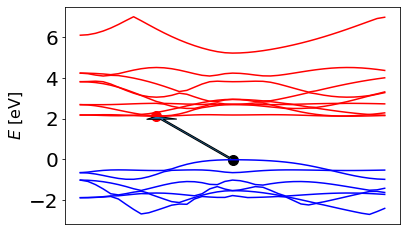

In [25]:
############# Plot Bandstructure ############

#######inputs$$###############
Band=plot_bands.plot_band_scf('./MoS2/bs/bs.out')
#print((Band))

xticks=['M','$\Gamma$','K']

ef0=1.48

plot_bands.plot_band_prod(Band[:,20:35],ef0)



In [2]:
MoS2.nscf(control={'calculation':'\'bands\''},system={'nbnd':54},
             kpoints={'grid':[6,6,1],
                      'kpoints_type': 'crystal'})

MoS2.prepare(20,type_run='nscf')

######### Run #####################

MoS2.run(4,type_run='nscf')


nscf
running nscf with 2 k and 2 tasks
ibrun /work2/05193/sabyadk/frontera/codes_EPW/q-e_new/q-e_ZPR_band/bin//pw.x -nk 2 -nt 2 -input nscf.in > nscf.out | tail -f nscf.out


In [4]:
######Wannierization #######

MoS2.wannier(win={'projections':[['Mo : d'],['S : p']], 
                  'num_wann':22,
                  'exclude_bands':'1-10,45-54',
                  'num_bands':34,
                  'dis_win_max':20,
                  'dis_win_min':-10,
                  'dis_froz_max':5.0,
                  'dis_froz_min':0.0,
                  'use_ws_distance': '.true.',
                  'write_hr':'.true.'
                 })



(36, 54)
(36, 54)
(36, 54)
(36, 54)


In [5]:
MoS2.prepare(20,type_run='wannier')

cp -r ./nscf/MoS2.save ./wannier


In [6]:
MoS2.run(1,type_run='wannier')

running wannier90
ibrun /work2/05193/sabyadk/frontera/codes_EPW/q-e_new/q-e_ZPR_band/bin//wannier.x -in MoS2.win MoS2.wout
